# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.
For example, given a person's health characteristics, we're going to build a model to predict whether or not they have heart disease.
It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

##  Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## 1 . Preparing the tools

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+


## 2. LOADING DATA

In [37]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## 3. Data Exploration

 The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

    What question(s) are you trying to solve?
    What kind of data do we have and how do we treat different types?
    What's missing from the data and how do you deal with it?
    Where are the outliers and why should you care about them?
    How can you add, change or remove features to get more out of your data?


In [38]:
# Exploitry data analysis 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [40]:
df.info() # to know the values and its data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
df.describe()  # to get the ,ean ,median ,std...

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
df.target.value_counts()
# Similaryly  sex.value_counts() (counts sex on 0 and 1 ), describe, info.
# info() → know the structure
# describe() → know the statistics & outliers
# value_counts() → know the frequency of categories
# crosstab() → know relationships between categories
# plots → visually confirm insights
# Compare target column with sex column
# pd.crosstab(index=df.target, columns=df.sex)

target
1    165
0    138
Name: count, dtype: int64

## 3.  Heart Disease Frequency according to Sex

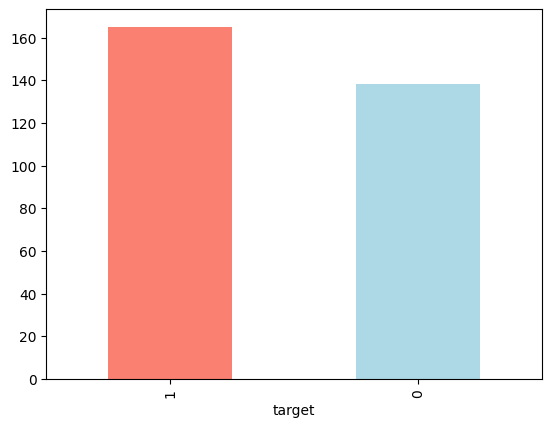

In [44]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

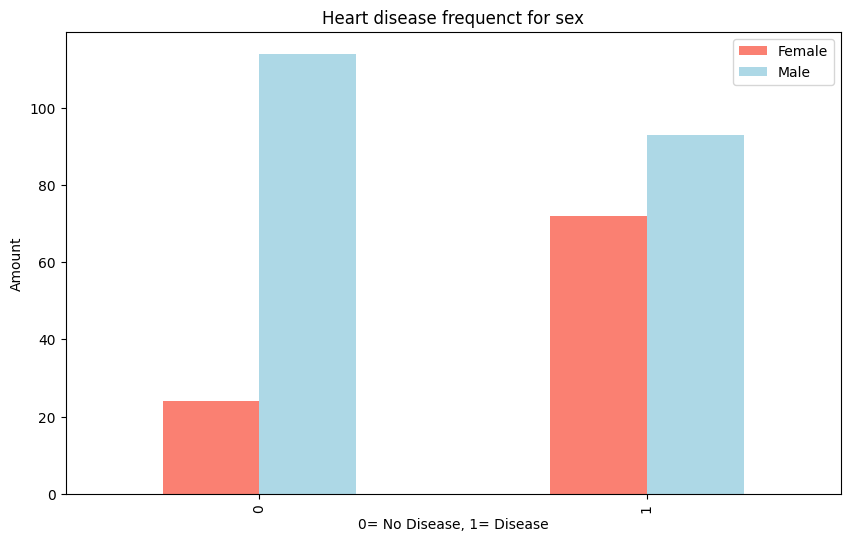

In [45]:
#Making our comparison visual


pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6), 
                                   color=["salmon", "lightblue"])
plt.title("Heart disease frequenct for sex") 
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]) # top right corner
plt.xticks()

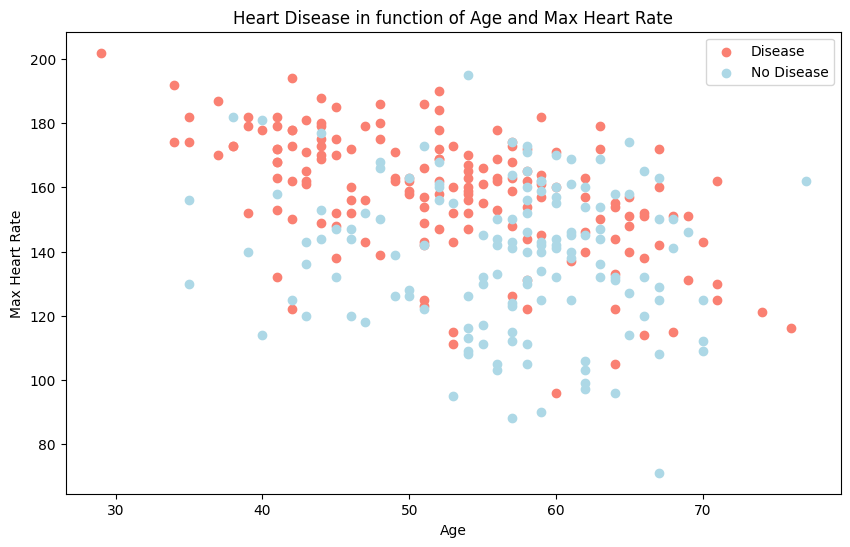

In [46]:
# Age vs. Max Heart Rate for Heart Disease
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

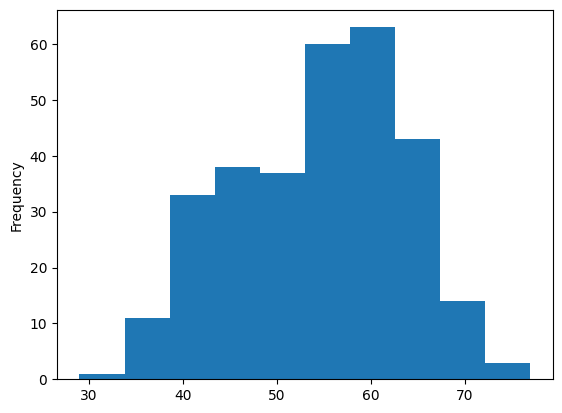

In [47]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## 4. Heart Disease Frequency per Chest Pain Type

    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease



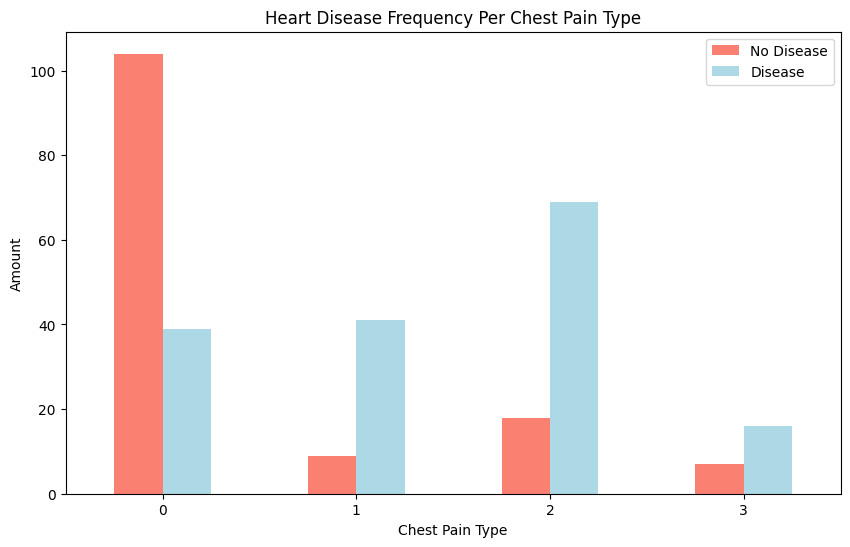

In [48]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [49]:
# Make a correlation matrix
# Correlation tells how strongly two variables are related:
# +1 → perfectly positive (as one goes up, the other also goes up).
# -1 → perfectly negative (as one goes up, the other goes down).
# 0 → no relationship.
df.corr()

# like compare target and cp,chol,fbs, .. +1,0,-1 (Positive correlation → Higher heart rate tends to mean higher chance of disease.~negative , 0 is null)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

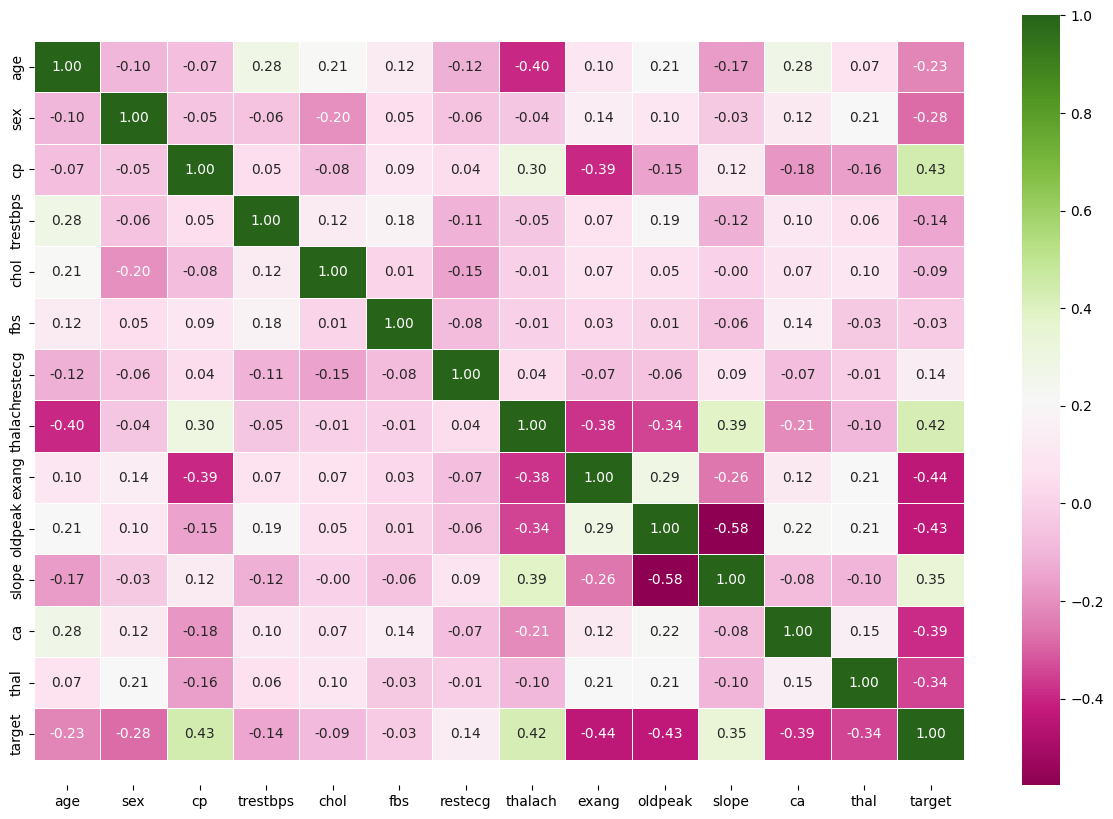

In [50]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True, #writes the actual correlation numbers inside each square.
              linewidths=0.5,
              fmt=".2f", #formats the numbers inside squares with 2 decimal places
              cmap="PiYG") #color map ("Yellow-Green-Blue")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) #fixes display bug.

🔹 Sequential (for ordered data – low → high)

"YlGnBu" → Yellow → Green → Blue
"YlOrRd" → Yellow → Orange → Red
"Blues" → Light Blue → Dark Blue
"Greens" → Light Green → Dark Green
"Oranges" → Light Orange → Dark Orange
"Purples" → Light Purple → Dark Purple
"Reds" → Light Red → Dark Red
"BuPu" → Blue → Purple
"GnBu" → Green → Blue
"PuRd" → Purple → Red
"pink" → Light Pink Gradient
🔹 Diverging (for values above & below a midpoint)
"coolwarm" → Blue → White → Red
"seismic" → Blue → White → Red (stronger contrast)
"bwr" → Blue → White → Red (simpler)
"RdBu" → Red → White → Blue
"PiYG" → Pink → White → Green
"PRGn" → Purple → White → Green
"BrBG" → Brown → White → Green-Blue
🔹 Qualitative (categorical data – distinct colors)
"tab10" → 10 distinct colors
"tab20" → 20 distinct colors
"Pastel1", "Pastel2" → Soft pastel shades
"Set1", "Set2", "Set3" → Bright sets of distinct colors
"Accent" → Vivid distinct colors
"Dark2" → Darker distinct colors
🔹 Misc Popular Options
"viridis" → Dark Blue → Green → Yellow (default, perceptually uniform)
"plasma" → Purple → Orange → Yellow
"inferno" → Black → Red → Yellow
"magma" → Black → Purple → Orange → White
"cividis" → Colorblind-friendly version of viridis

## 5. Modelling

In [51]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
X = df.drop("target", axis=1)
y = df["target"]
#X = Features (all independent variables).
# y = Target (dependent variable we want to predict).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

The 3 algorithms
Logistic Regression → Used for classification (probability-based, not really “regression”).
K-Nearest Neighbors (KNN) → Classifies based on nearest neighbors in feature space.
Random Forest → Ensemble of decision trees (robust, good baseline).

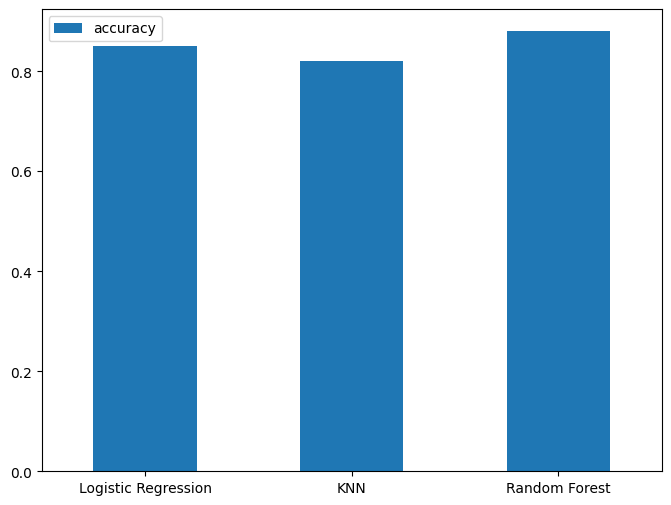

In [53]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)  # train model
        model_scores[name] = model.score(X_test, y_test)  # accuracy
    return model_scores
# fit() → Train the model on training data.
# score() → Returns accuracy by default (fraction of correct predictions).
# Accuracy = 
# correct  predictions/ total predictions
# correct predictions

# Example model scores dictionary
model_scores = {
    "Logistic Regression": 0.85,
    "KNN": 0.82,
    "Random Forest": 0.88
}

# Convert to DataFrame
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(rot=0, figsize=(8,6));


## 6. Hyperparameter Tuning

Every ML model has hyperparameters (settings chosen before training).
Example:

1. Logistic Regression → C (regularization strength).
2. KNN → n_neighbors.
3. Random Forest → n_estimators, max_depth, etc.

#### Manual Search
You try values by hand (e.g., n_neighbors = 3, 5, 10) and see which is best.
Simple but slow.

#### Grid Search
You give a grid of values (like n_neighbors = [1, 3, 5, 7, 9]).
The computer tests all combinations.

#### Random Search
Instead of testing all, it picks random combinations within a range.
Faster when hyperparameters are many. 

In [54]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [55]:
## 6.1 Tune KNeighborsClassifier

In [56]:
# Create a list of train scores
train_scores = []
# Create a list of test scores
test_scores = []
# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20
# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [57]:
train_scores

# If K is too small → model memorizes training data (overfitting).
# If K is too large → model is too simple (underfitting).
# By plotting train_scores vs test_scores, you see which K gives best balance.

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


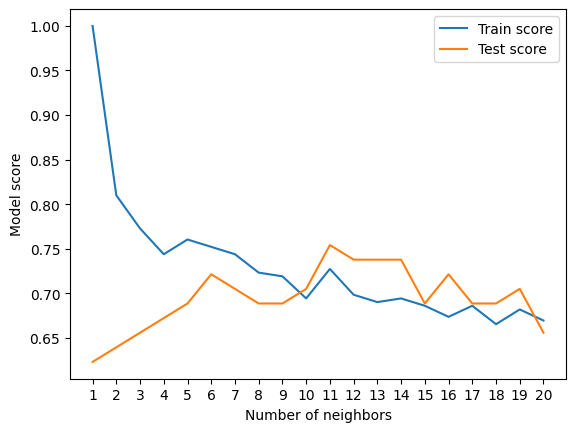

In [58]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [59]:
# 6.2 Tuning models with with RandomizedSearchCV

Logistic Regression → hyperparameter = C (regularization strength). ==>> "C" → Regularization strength.
Small C = stronger regularization (simpler model).
Large C = weaker regularization (model fits more complex patterns).

Random Forest → hyperparameters = n_estimators (number of trees), max_depth (depth of each tree), etc.


In [61]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
#np.logspace(-4, 4, 20) = generates 20 values from 10^-4 to 10^4.
#"solver": ["liblinear"] → Optimization algorithm used to train Logistic Regression.

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50), #number of trees in the forest (10, 60, 110, … 960).
           "max_depth": [None, 3, 5, 10],  #maximum depth of a tree (None = grow fully).
           "min_samples_split": np.arange(2, 20, 2),  #minimum samples needed to split a node (prevents overfitting).
           "min_samples_leaf": np.arange(1, 20, 2)} #minimum samples needed in a leaf node (also prevents overfitting).

In [62]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


In [63]:
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [64]:
rs_log_reg.best_params_
# {'solver': 'liblinear', 'C': 0.233...}

rs_log_reg.score(X_test, y_test)
# 0.8852


0.8852459016393442

In [65]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train, y_train)

# cv=5 → 5-fold cross validation (splits data into 5 parts, trains on 4, tests on 1, repeats).
# n_iter=20 → try 20 random hyperparameter combinations.
# verbose=True → shows progress in console.

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [66]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': np.int64(710),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(11),
 'max_depth': 3}

In [67]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [68]:
#6.3 Tuning a model with GridSearchCV

In [73]:
# Different LogisticRegression hyperparameters
log_reg_grid = {
    "C": [0.01, 0.1, 1, 10],        # different strengths of regularization
    "solver": ["liblinear", "saga"] # different optimization methods
}

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

gs_log_reg = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,            # 5-fold cross-validation
    verbose=2        # print progress
)

gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solve

C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_mode

[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................

C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahalakhmi U\miniconda3\Lib\site-packages\sklearn\linear_mode

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'solver': ['liblinear', 'saga']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [74]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 1, 'solver': 'liblinear'}

In [76]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8688524590163934

## 7. Evaluating a classification model, beyond accuracy

Metric/Evaluation Technique 	             Scikit-Learn method/documentation
1. ROC curve and AUC score 	                  ----sklearn.metrics.RocCurveDisplay(), Note: This was previously sklearn.metrics.plot_roc_curve(), as of Scikit-Learn version 1.2+, it is sklearn.metrics.RocCurveDisplay().
2. Confusion matrix 	                      ---sklearn.metrics.confusion_matrix()
3. Classification report 	                  ---sklearn.metrics.classification_report()
4. Precision 	                              ---sklearn.metrics.precision_score()
5. Recall 	                                  ---sklearn.metrics.recall_score()
6. F1-score 	                              ---sklearn.metrics.f1_score()

In [ ]:
# 7.1 ROC Curve and AUC Scores

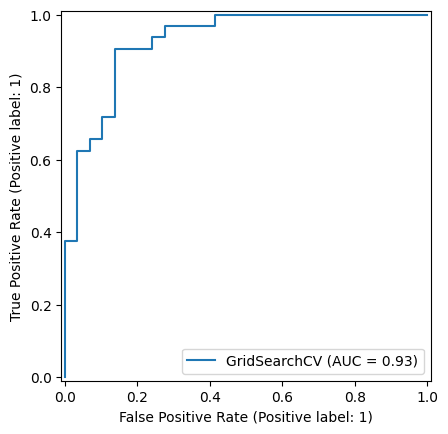

In [78]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

In [84]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [85]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 4 28]]


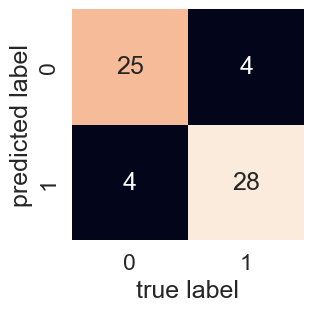

In [86]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [88]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



🔹 1. Accuracy

👉 “How often is the model correct overall?”
Example: 89% accuracy = correct 89 times out of 100.
Problem: If classes are imbalanced (say 95% healthy, 5% disease), accuracy can lie.

🔹 2. ROC Curve + AUC
👉 “How well does the model separate classes across thresholds?”
Shows the trade-off between True Positive Rate (Recall) and False Positive Rate.
AUC = 0.5 → random guessing.
AUC = 1.0 → perfect separation.
Purpose: To check if the model is good at ranking/class separation (not just yes/no predictions).

🔹 3. Confusion Matrix
👉 “Where exactly does the model make mistakes?”
Splits errors into:
False Positives (FP) → predicts “disease” but patient is healthy (false alarm).
False Negatives (FN) → predicts “healthy” but patient is sick (missed diagnosis ⚠️).
Purpose: To see types of errors, not just how many.

🔹 4. Classification Report
👉 “How good is the model for each class?”
Precision → When model says “disease”, how often is it right?
Recall → Of all actual patients, how many did we catch?
F1-score → Balance of both.
Purpose: To decide what matters more: catching every patient (recall) vs avoiding false alarms (precision).

🔹 5. Seaborn Heatmap (visual confusion matrix)

👉 Same as confusion matrix but visual.
Easier for presentations, quick spotting of errors.

In [90]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1, 'solver': 'liblinear'}

In [95]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [96]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8215300546448088)

In [97]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.817900063251107)

In [98]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

np.float64(0.8727272727272727)

In [99]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

np.float64(0.8431741323998502)

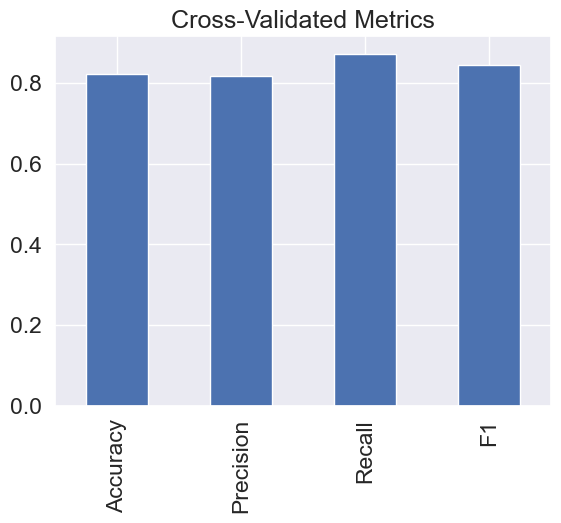

In [100]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## 8. Feature importance

In [103]:
clf.fit(X_train, y_train);
# Check coef_
clf.coef_

array([[ 0.00663683, -1.35695063,  0.78895787, -0.01257611, -0.00234552,
         0.12991051,  0.52477228,  0.02605101, -0.89196171, -0.61335432,
         0.66345832, -0.77197046, -0.85912443]])

In [104]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

# Positive coefficient → increases the probability of predicting class 1 (disease).
# Negative coefficient → decreases the probability of predicting class 1 (so model leans towards class 0 = no disease).

{'age': np.float64(0.006636829005035779),
 'sex': np.float64(-1.3569506314654125),
 'cp': np.float64(0.7889578667680376),
 'trestbps': np.float64(-0.012576111457234241),
 'chol': np.float64(-0.002345516658788795),
 'fbs': np.float64(0.1299105119198519),
 'restecg': np.float64(0.5247722843272856),
 'thalach': np.float64(0.026051007618628347),
 'exang': np.float64(-0.8919617100123199),
 'oldpeak': np.float64(-0.6133543227386139),
 'slope': np.float64(0.6634583179840161),
 'ca': np.float64(-0.7719704596539855),
 'thal': np.float64(-0.8591244302518062)}

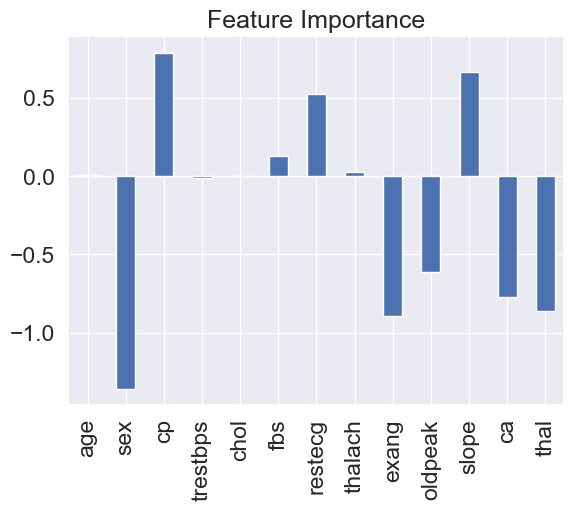

In [105]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);


In [107]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.
And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.